
**Principi prezentacije i prepoznavanja oblika-**Projekat: Detekcija defekata čelika

**Tema:** Detekcija oštećenja površine čelika u svrsi provere kvaliteta materijala pre dalje produkcije

**Učitavanje podataka:** Set podataka predstavljaju fotografije koje se nalaze u zipovanom folderu na Google Drive-u 

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS" -O images.zip && rm -rf /tmp/cookies.txt

--2022-09-05 16:47:12--  https://docs.google.com/uc?export=download&confirm=t&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS
Resolving docs.google.com (docs.google.com)... 142.251.45.14, 2607:f8b0:4004:c17::65, 2607:f8b0:4004:c17::66, ...
Connecting to docs.google.com (docs.google.com)|142.251.45.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ml9m971641mi8nubq7lki455jci24k6q/1662396375000/06049624160957438625/*/1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS?e=download&uuid=87ec4bbf-eb5f-4fda-9985-c70d7ae1b53f [following]
--2022-09-05 16:47:12--  https://doc-0g-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ml9m971641mi8nubq7lki455jci24k6q/1662396375000/06049624160957438625/*/1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS?e=download&uuid=87ec4bbf-eb5f-4fda-9985-c70d7ae1b53f
Resolving doc-0g-64-docs.googleusercontent.com (doc-0g-64-docs.googleusercontent.com)... 14

In [2]:
!unzip images.zip

Archive:  images.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


U narednoj ćeliji uz pomoć biblioteke matplotlib, učitana je fotografija kako bih uvideo šta se nalazi na njoj. Pošto na prvi pogled nije moguće zaključiti o čemu se radi, nakon pretrage na internetu pronašao sam da je u pitanju površina čelika na kojoj je potrebno utvrditi da li postoji oštećenje

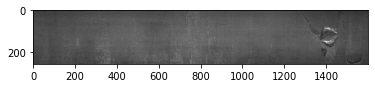

In [3]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
image =(imread('train_images/ff9d46e95.jpg'))
plt.imshow(image)
plt.show()

U narednoj ćeliji učitaću sve biblioteke potrebne za projekat

In [4]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import keras
from PIL import Image
from pathlib import Path
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.models import Sequential, Model, load_model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.optimizers import adam_v2, sgd_experimental, rmsprop_v2
from keras.callbacks import Callback, EarlyStopping
from keras.utils import tf_utils
from sklearn.metrics import confusion_matrix
from keras import backend as K
import tensorflow as tf
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

Učitavanje csv fajla sa nazivima fotografija, klase kojoj pripadaju i enkodovane vrednosti piksela fotografija. Train.csv fajl se koristi za treniranje algoritma kako kasnije izvršio klasifikaciju fotografija u ispravnu klasu

In [5]:
data = pd.read_csv("/content/train.csv")

Upoznavanje sa datasetom podataka

3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

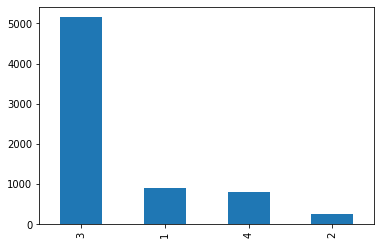

In [6]:
data["ClassId"].value_counts().plot(kind = 'bar')
data["ClassId"].value_counts()

In [7]:
data.shape

(7095, 3)

In [8]:
data.info

<bound method DataFrame.info of             ImageId  ClassId  \
0     0002cc93b.jpg        1   
1     0007a71bf.jpg        3   
2     000a4bcdd.jpg        1   
3     000f6bf48.jpg        4   
4     0014fce06.jpg        3   
...             ...      ...   
7090  ffcf72ecf.jpg        3   
7091  fff02e9c5.jpg        3   
7092  fffe98443.jpg        3   
7093  ffff4eaa8.jpg        3   
7094  ffffd67df.jpg        3   

                                          EncodedPixels  
0     29102 12 29346 24 29602 24 29858 24 30114 24 3...  
1     18661 28 18863 82 19091 110 19347 110 19603 11...  
2     37607 3 37858 8 38108 14 38359 20 38610 25 388...  
3     131973 1 132228 4 132483 6 132738 8 132993 11 ...  
4     229501 11 229741 33 229981 55 230221 77 230468...  
...                                                 ...  
7090  121911 34 122167 101 122422 169 122678 203 122...  
7091  207523 3 207777 9 208030 15 208283 22 208537 2...  
7092  105929 5 106177 14 106424 24 106672 33 106923 ...  
709

In [9]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


**Augmentacija fotografija-**predstavlja proceduru sa kojom se skup podataka proširuje primenom transformacija nad slikama.Transformacijama se kreiraju slike koje se razlikuju od onih u skupu podataka.Primena augmentacije se vrši radi poboljšanja preciznosti i tačnosti modela.

In [10]:
l1=[]
l2=[]
for img,ClassId,EncodedPixels in tqdm(data.values):
  image=cv2.imread("/content/train_images/{}".format(img), cv2.IMREAD_COLOR)
  image=cv2.resize(image, (150,150))
  l1.append(image)
  l2.append(ClassId)

100%|██████████| 7095/7095 [00:34<00:00, 202.97it/s]


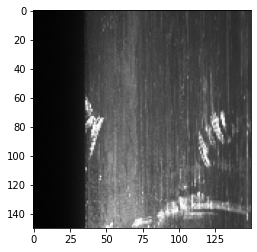

In [11]:
i = 100
plt.imshow(l1[i])

Normalizacija piksela:Mašini je potrebno input pretvoriti u numerički zapis kako bi mogao da razume šta je zapisano u tekstu. Normalizacijom ćemo piksele pretvoriti u numerički zapis kako bi algoritam jednostavnije mogao da ih obradi i donese odluku. U projektu se za postupak normalizacije koristi klasa LabelEncoder, koja input pretvara u klasu u opsegu od 0 do n-1, gde je n broj elemenata inputa

In [12]:
encoder = LabelEncoder()

X=np.array(l1)
X=X/255

y=encoder.fit_transform(l2)
y=to_categorical(y)

**Treniranje modela:**Set podataka je podeljen u odnosu 80:20, 80% podataka se koristi za treniranje modela i 20% za testiranje modela. Treniranje modela se vrši kako bi algoritam u ovom slučaju kasnije na test podacima izvršio postupak detekcije oštećenja i klasifikacije fotografije u određenu klasu

**Hiper parametri:** *X i y* su nizovi koji se koriste za podelu,
                    *test_size* ukazuje u kom opsegu se vrši podela seta podataka,
                    *stratify *deli set podataka u stilu stratifikacije(u zavisnosti od labela set podataka),
                    *shuffle* je parametar kojim se ukazuje da li će se set podataka promešati pre nego se izvrši podela,
                    *random_state* je parametar koji kontroliše mešanje podataka pre primene podele

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True,random_state=32)

In [14]:
print("X trening: ",X_train.shape)
print("X test: ",X_test.shape)
print("y trening: ",y_train.shape)
print("y test: ",y_test.shape)

X trening:  (5676, 150, 150, 3)
X test:  (1419, 150, 150, 3)
y trening:  (5676, 4)
y test:  (1419, 4)


**Kreiranje CNN modela-**Convolutional Neural Network  predstavlja model deep learning-a kojim se vrši klasifikacija fotografija u kontekstu kompjuterske vizije.

In [15]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))

Narednom ćelijom se prikazuju detalji izgrađenog modela.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 256)               3

Narednom ćelijom ćemo zaustaviti treniranje modela kada metrike prestanu da ostvaruju bolje rezultate. Za to se koristi klasa EarlyStopping.Argumenti: patience - broj epoha nakon koje se prekida trening ukoliko u okviru svake od epoha metrike ne pokažu bolje rezultate; min_delta - minimalna promena praćene metrike koja će se smatrati poboljšanjem; restore_best_weights - da li vratiti najbolje rezultate iz prethodne epohe u trenutnu epohu.

In [17]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True,)

**Kompajlovanje modela-**Kompajliranje modela pre treninga se postiže metodom compile. Argumenti metode su: loss-funkcija gubitka; optimizer- optimizator klase. Adam klasa je optimizator koji minimizira grešku i implementira Adamov algoritam. Adamov optimizator je metoda stohastičkog gradijentalnog spusta koja se zasniva na adaptivnoj proceni momenta prvog i drugog reda. metrics - lista metrika koje će model da evaluira tokom treninga i testa, u ovom slučaju prati se tačnost (accuracy).

In [18]:
from sklearn import metrics
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

Sledeći korak je treniranje modela za zadati broj epoha.Postupak se vrši primenom metode fit na kreirani model. Argumenti metode: X_train - ulazni niz podataka; y_train - ciljane vrednosti; epochs - broj epoha(iteracija nad setom podataka); validation_data - podaci na osnovu kojih treba proceniti gubitak i sve metrike modela na kraju svake epohe;batch_size - broj uzoraka pri svakom pojedinačnom spustu; verbose - režim opširnosti; callbacks - lista callback instanci koje se izvršavaju tokom treninga

In [19]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1, callbacks=[early_stopping])

Epoch 1/20
45/45 [==============================] - 75s 2s/step - loss: 0.8221 - accuracy: 0.7199 - val_loss: 0.7172 - val_accuracy: 0.7449
Epoch 2/20
45/45 [==============================] - 68s 1s/step - loss: 0.6873 - accuracy: 0.7431 - val_loss: 0.6984 - val_accuracy: 0.7470
Epoch 3/20
45/45 [==============================] - 66s 1s/step - loss: 0.6371 - accuracy: 0.7530 - val_loss: 0.6276 - val_accuracy: 0.7583
Epoch 4/20
45/45 [==============================] - 67s 1s/step - loss: 0.5920 - accuracy: 0.7678 - val_loss: 0.6606 - val_accuracy: 0.7569
Epoch 5/20
45/45 [==============================] - 66s 1s/step - loss: 0.5608 - accuracy: 0.7722 - val_loss: 0.6192 - val_accuracy: 0.7498
Epoch 6/20
45/45 [==============================] - 67s 1s/step - loss: 0.5194 - accuracy: 0.7835 - val_loss: 0.6323 - val_accuracy: 0.7484
Epoch 7/20
45/45 [==============================] - 67s 1s/step - loss: 0.4961 - accuracy: 0.7988 - val_loss: 0.6136 - val_accuracy: 0.7618
Epoch 8/20
45/45 [==

Nakon što se izvrši kompajliranje i prolazak kroz set podataka u n epoha, rezultati treninga se smeštaju u data frame i rezultati se prikazuju putem grafova. Prvi graf se odnosi na funkciju gubitka, a drugi na tačnost kao metrika koja je praćena tokom treninga.

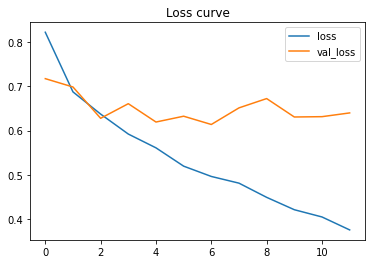

In [20]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

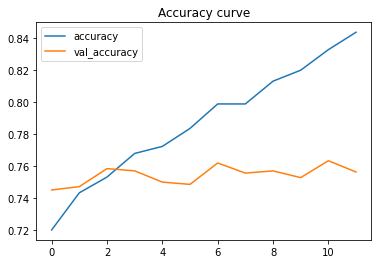

In [21]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

Prikaz rezultata koji su postignuti nad setom podataka sa korišćenjem kreiranog modela. Poziva se metoda evaluate kojoj se prosleđuju test setovi obeležja i ciljanih vrednosti. Metoda vraća rezultate gubitka i tačnosti koji su dobijeni primenom modela na set podataka. Ovim modelom dobijena je tačnost predviđanja klase slika 76.18%.

In [22]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

45/45 [==============================] - 5s 114ms/step - loss: 0.6136 - accuracy: 0.7618
[+] Accuracy: 76.18%


**Detekcija oštećenja-**Nastavak rada odnosi se na detekciju oštećenja odnosno klasifikaciju fotografija u odnosu na detektovana oštećenja

In [23]:
df = pd.read_csv('/content/train.csv')
print('Dataframe shape: ', df.shape)
df.head()

Dataframe shape:  (7095, 3)


,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


Podela data frame-a po vrednosti ImageId.

In [24]:
df['ImageId'] = df['ImageId'].apply(lambda x: x.strip())
df.ImageId.describe()

count              7095
unique             6666
top       ef24da2ba.jpg
freq                  3
Name: ImageId, dtype: object

In [25]:
train_img_set = set(list(os.listdir('train_images')))
print('Ukupan broj fotografija u train_images folderu: ', len(train_img_set))
defect_img_set = set(df['ImageId'].values)
print('Ukupan broj fotografija uključenih u fajl train.csv: ', len(defect_img_set))
if (defect_img_set.issubset(train_img_set)):
    print('Svi ImageId koji se nalaze u train.csv su takođe u train_images folderu.')

Ukupan broj fotografija u train_images folderu:  12568
Ukupan broj fotografija uključenih u fajl train.csv:  6666
Svi ImageId koji se nalaze u train.csv su takođe u train_images folderu.


Broj ImageId-ijeva koji nisu oštećeni:  5902


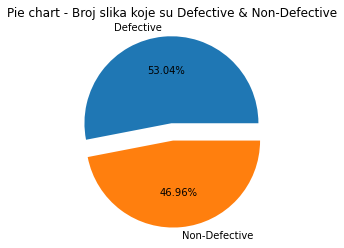

In [26]:
print('Broj ImageId-ijeva koji nisu oštećeni: ', len(train_img_set) - len(defect_img_set))
non_defect_img_set = train_img_set - defect_img_set

plt.pie([len(defect_img_set), len(non_defect_img_set)], labels = ['Defective', 'Non-Defective'], explode = [0.1]*2, startangle = 0, autopct='%1.2f%%')
plt.title('Pie chart - Broj slika koje su Defective & Non-Defective')
plt.show()

In [27]:
df['ClassId'].astype('str').describe()

count     7095
unique       4
top          3
freq      5150
Name: ClassId, dtype: object

Grafikon koji prikazuje udeo klase fotografija u celokupnom setu podataka / fotografija.

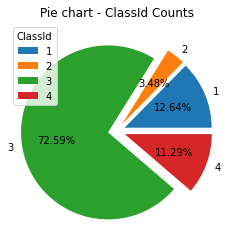

,ClassId,Count,count-percentage
0,1,897,12.642706
1,2,247,3.481325
2,3,5150,72.586328
3,4,801,11.289641


In [28]:
ClassId_cnt_df = pd.DataFrame(df['ClassId'].value_counts().sort_index()).rename(columns = {'ClassId':'Count'})
ClassId_cnt_df['count-percentage'] = ClassId_cnt_df*100/ClassId_cnt_df.sum()

plt.pie(ClassId_cnt_df['Count'], labels = ClassId_cnt_df['Count'].index, explode = [0.1]*4, startangle = 0, autopct='%1.2f%%')
plt.legend(title = "ClassId")
plt.title('Pie chart - ClassId Counts')
plt.show()

ClassId_cnt_df.reset_index().rename(columns = {'index':'ClassId'})

In [29]:
nos_labels_per_img_df = df.groupby('ImageId')['ClassId'].count()#reset_index()#.rename(columns = {'ClassId':'Count'})

nos_labels_per_img_df.head(10)

ImageId
0002cc93b.jpg    1
0007a71bf.jpg    1
000a4bcdd.jpg    1
000f6bf48.jpg    1
0014fce06.jpg    1
0025bde0c.jpg    2
002af848d.jpg    1
002fc4e19.jpg    2
0030401a5.jpg    1
0046839bd.jpg    1
Name: ClassId, dtype: int64

Prva sledeća linija koda odnosi se na broj uočenih oštećanja po slikama. Druga sledeća linija govori o tome kog su formata fotografije koje se nalaze u fajlu train_images koji je korišćen u projektu.

In [30]:
data = nos_labels_per_img_df.value_counts().sort_index()
for index, value in data.items():
    print("Number of images with {} number of defect labels: {}".format(index, value))

Number of images with 1 number of defect labels: 6239
Number of images with 2 number of defect labels: 425
Number of images with 3 number of defect labels: 2


In [31]:
img_shapes = set()
for img in list(os.listdir('train_images')):
    img_shapes.add(cv2.imread('train_images/'+img).shape)
img_shapes

{(256, 1600, 3)}

Definisanje metode koja na osnovu prosleđene fotografije generiše odgovarajuću masku koja prikazuje pozicuju prepoznatih oštećenja.

In [32]:
def rle2mask(mask_rle, shape=(1600,256)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

Prolazi se kroz čitav set podataka i za svaku pojedinačnu sliku generiše se njena maska pozivom prethodno definisane metode. Kao rezultat dobijaju se side-by-side stvarne fotografije i njihove maske, u rezultatu se prikazuju samo po pet fotografija iz svake klase.

In [33]:
import random

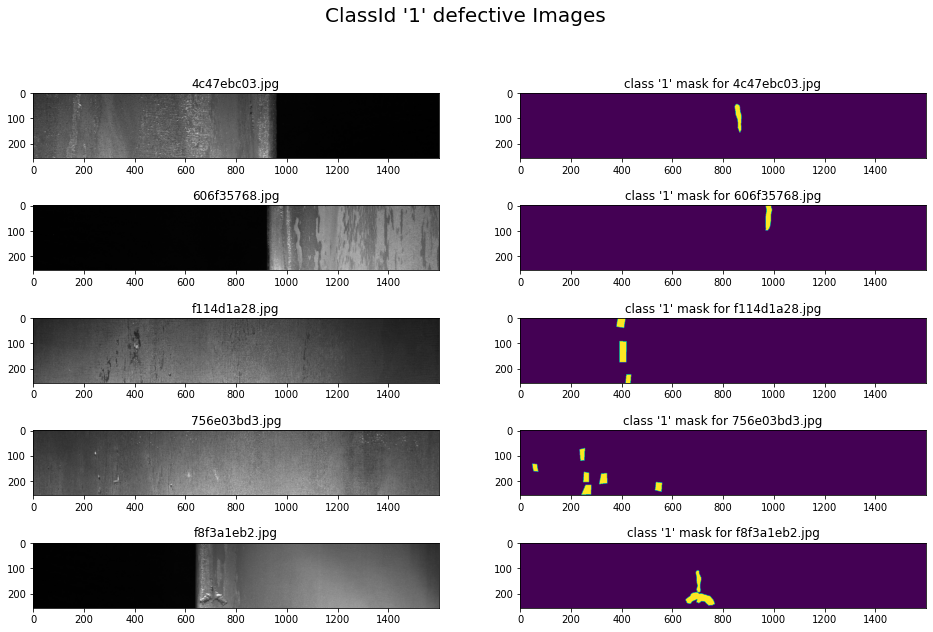

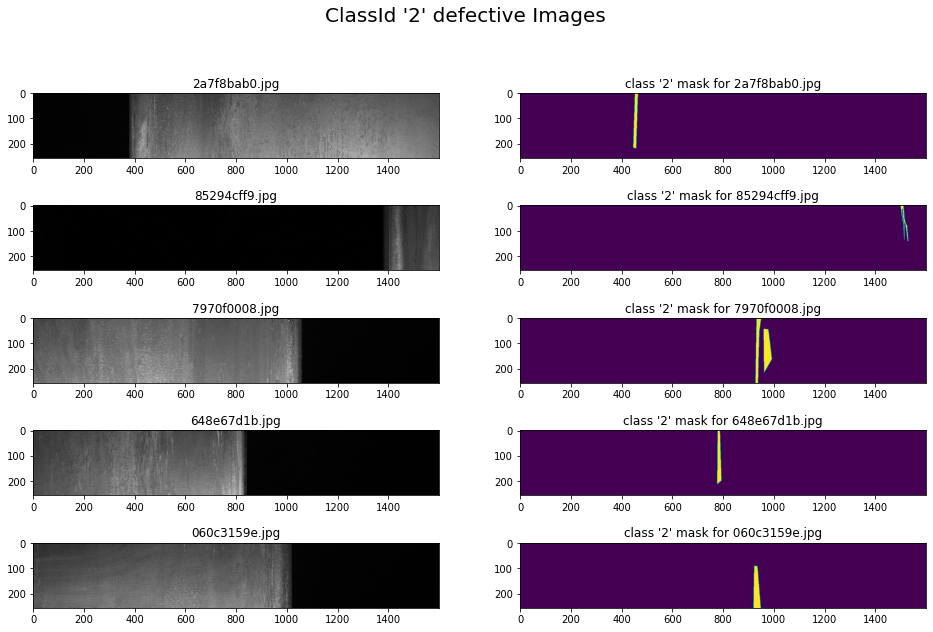

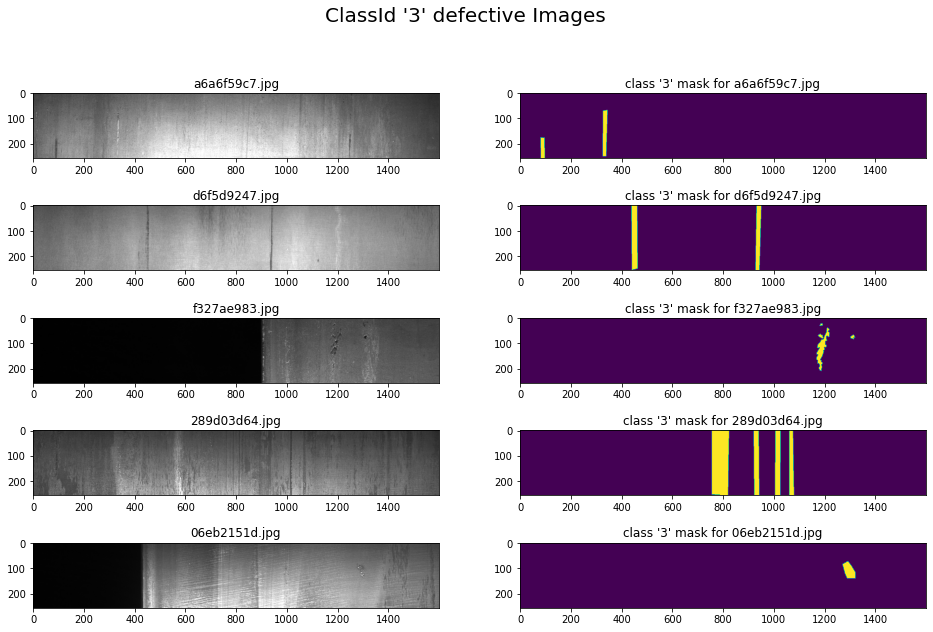

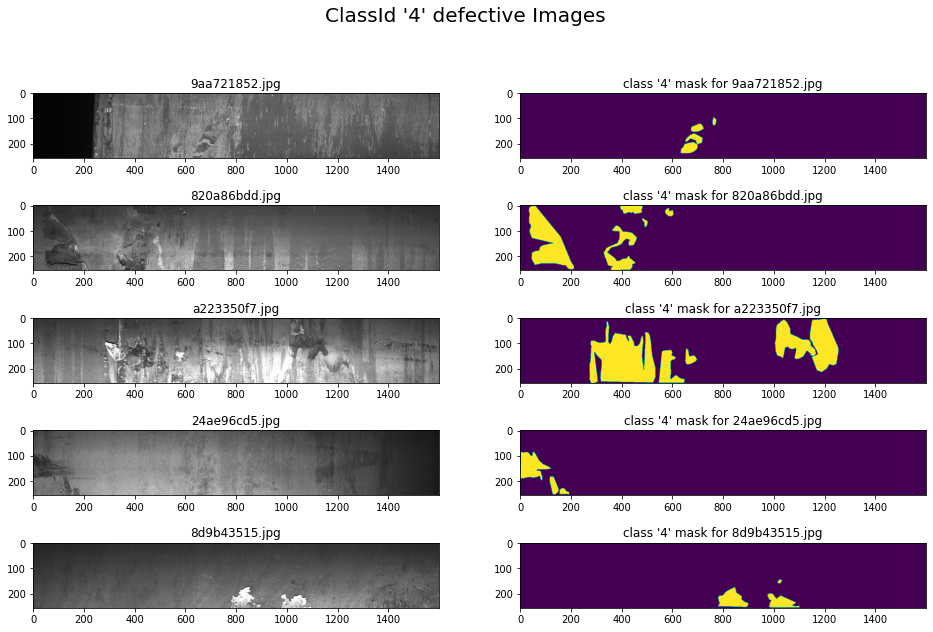

In [34]:
for ClassId in [1,2,3,4]:
    class_df = df[df['ClassId'] == ClassId]
    fig, axs = plt.subplots(5, 2, figsize=(16,10))
    fig.suptitle("ClassId '{}' defective Images".format(ClassId), fontsize=20)
    x,y = 0,0
    for i, img_id in enumerate(random.sample(set(class_df['ImageId'].values), 5)):
        img_obj = cv2.imread('train_images/'+ img_id)
        axs[i,0].imshow(img_obj)
        axs[i,0].set_title(img_id)
        rle = class_df[class_df['ImageId'] == img_id]['EncodedPixels'].iloc[0]
        mask = rle2mask(rle)
        axs[i,1].imshow(mask)
        axs[i,1].set_title("class '{}' mask for ".format(ClassId) + img_id)
    plt.show()
    print('='*100)

**Zaključak-**Projekat je zamišljen na takav način da se primenom CNN vrste neuronske mreže izvrši kreiranje modela algoritma mašinskog učenja koji će biti u stanju da na ispravan način detektuje oštećenja i klasifikuje fotografije u odgovarajuće klase.

Što se tiče samog projekta, uočeno je da nakon 11 prolaska (epohe) kroz set fotografija, model prestaje da daje bolje rezultate za vrednosti gubitka zato je i prekinut trening nakon njega. Postignuta tačnost je 76%, odlučeno je da se prati tačnost zbog same teme, recall je bolji u nekim kontekstima poput medicine, ali ovde je sasvim korektan accuracy.

Verujem da algoritam može dodatno da se unapredi dodavanjem slojeva neuronske mreže, primenom drugih vrsta modela ili igranjem sa hiperparametrima.


**Literatura**

1. scikit-learn: machine learning in python, scikit-learn
2. Vežbe 9, 10.
3. Tensorflow - CNN, CNN model
4. Geeks for Geeks, GG

